In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import openpyxl
from collections import Counter

In [2]:
data_dir = "/Users/Owner/Desktop/MATH485/Text Data/"
file_name = "Digital Science SDG training set searches.xlsx"
sdg_names = pd.read_excel(data_dir + file_name)
sdg_names

,Unnamed: 0,Each tab contains the keywords/phrases used for generating the training set.,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Goal,Name,NaN
3,1,No Poverty,End poverty in all its forms everywhere
4,2,Zero Hunger,"End hunger, achieve food security and improved..."
5,3,Good Health and Well Being,Ensure healthy lives and promote well-being fo...
6,4,Quality Education,Ensure inclusive and equitable quality educati...
7,5,Gender Equality,Achieve gender equality and empower all women ...
8,6,Clean Water and Sanitation,Ensure availability and sustainable management...
9,7,Affordable and Clean Energy,"Ensure access to affordable, reliable, sustain..."


In [3]:
sdg_names = sdg_names.drop([0,1,2], axis=0)
sdg_names = sdg_names.set_axis(["sdg", "sdg_name", "sdg_definition"],axis=1, copy=False)
sdg_names.reset_index(inplace=True,drop=True)
sdg_names

,sdg,sdg_name,sdg_definition
0,1,No Poverty,End poverty in all its forms everywhere
1,2,Zero Hunger,"End hunger, achieve food security and improved..."
2,3,Good Health and Well Being,Ensure healthy lives and promote well-being fo...
3,4,Quality Education,Ensure inclusive and equitable quality educati...
4,5,Gender Equality,Achieve gender equality and empower all women ...
5,6,Clean Water and Sanitation,Ensure availability and sustainable management...
6,7,Affordable and Clean Energy,"Ensure access to affordable, reliable, sustain..."
7,8,Decent Work and Economic Growth,"Promote sustained, inclusive and sustainable e..."
8,9,"Industry, Innovation and Infrastructure","Build resilient infrastructure, promote inclus..."
9,10,Reduced Inequalities,Reduce inequality within and among countries


In [4]:
sdg_names.to_csv("sdg_name_definition.csv", index=False, quotechar='"')

In [5]:
text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43025 entries, 0 to 43024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              43025 non-null  object 
 1   text_id          43025 non-null  object 
 2   text             43025 non-null  object 
 3   sdg              43025 non-null  int64  
 4   labels_negative  43025 non-null  int64  
 5   labels_positive  43025 non-null  int64  
 6   agreement        43025 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.3+ MB


In [6]:
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26526 entries, 0 to 26525
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text_id          26526 non-null  object 
 1   text             26526 non-null  object 
 2   sdg              26526 non-null  int64  
 3   labels_negative  26526 non-null  int64  
 4   labels_positive  26526 non-null  int64  
 5   agreement        26526 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


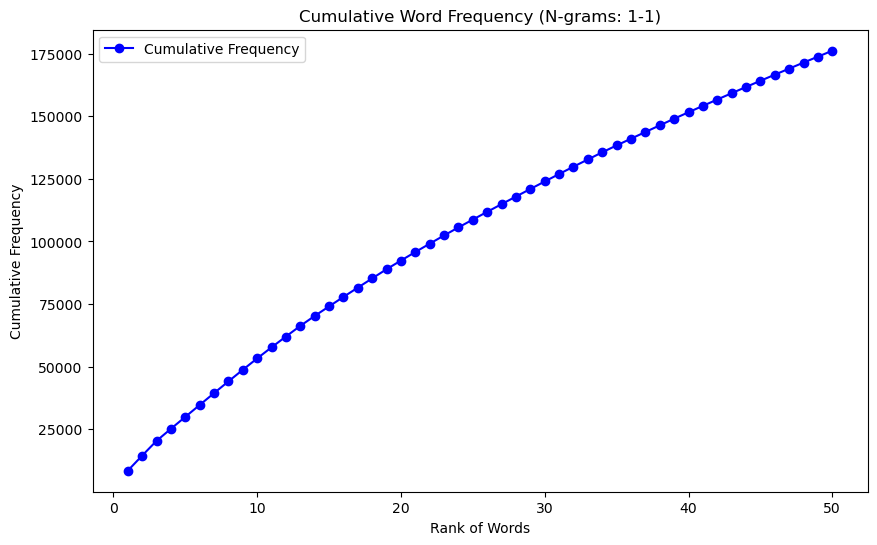

Cumulative percentage of top 50 words: 7.00%


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [8]:
# Reuse the existing count_word function
def count_word(corpus):
    result = 0
    for x in corpus:
        result += len(x.split())
    return result

# Reuse the existing count_zero function
def count_zero(arr):
    zero_arr = np.zeros((arr.shape[0], arr.shape[1]))
    return np.sum(arr == zero_arr)

# Word freq function
def word_frequency_analysis(corpus, ngram_range=(1,1), stop_word=None):
   
    count_vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_word, min_df=1)
    count_vectorizer.fit(corpus)
  
    words = count_vectorizer.get_feature_names_out()
    word_count = count_vectorizer.transform(corpus).toarray()
    
    # Calculate word freq
    word_frequencies = np.sum(word_count, axis=0)
    
    # Get the top 50 most frequent words
    most_common_words = Counter(dict(zip(words, word_frequencies))).most_common(50)
    
    # Extract words and their frequencies
    top_words, top_frequencies = zip(*most_common_words)
    cumulative_frequencies = np.cumsum(top_frequencies)
    
    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 51), cumulative_frequencies, marker='o', color='b', label='Cumulative Frequency')
    plt.xlabel('Rank of Words')
    plt.ylabel('Cumulative Frequency')
    plt.title(f'Cumulative Word Frequency (N-grams: {ngram_range[0]}-{ngram_range[1]})')
    plt.legend()
    plt.show()
    
    # total number of words in the corpus
    total_words = count_word(corpus)
    percentage = (cumulative_frequencies[-1] / total_words) * 100
    print(f"Cumulative percentage of top 50 words: {percentage:.2f}%")

# unigrams and stop words removed
corpus = text_df['text']
word_frequency_analysis(corpus, ngram_range=(1, 1), stop_word="english")

text_df['sdg'] = text_df['sdg'].astype(str)
sdg8_corpus = text_df[text_df['sdg'].str.contains("SDG 8")]['text']

# Run the word frequency analysis on SDG 8 documents
word_frequency_analysis(sdg8_corpus, ngram_range=(1, 1), stop_word="english")


# Apply to SDG 8 corpus (only documents labeled with SDG 8)
sdg8_corpus = text_df[text_df['sdg'].str.contains("SDG 8")]['text']
word_frequency_analysis(sdg8_corpus, ngram_range=(1, 1), stop_word="english")


In [9]:
corpus = text_df.text

# bigrams, with stop words removed
count_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=5)
count_vector = count_vectorizer.fit_transform(corpus).toarray()
print(f"Vocabulary size: {len(count_vectorizer.vocabulary_)}")
print(f"Vector shape: {count_vector.shape}")

# Create df and display bigrams frequency
count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
bigram_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq": count_vector_df.sum(axis=0)})
print(bigram_freq.sort_values(by="freq", ascending=False)[:30])


Vocabulary size: 28447
Vector shape: (26526, 28447)
                                            term  freq
human rights                        human rights  2003
climate change                    climate change  1361
et al                                      et al  1253
oecd countries                    oecd countries   951
developing countries        developing countries   895
health care                          health care   888
united states                      united states   833
long term                              long term   798
international law              international law   779
labour market                      labour market   761
gender equality                  gender equality   628
energy efficiency              energy efficiency   548
private sector                    private sector   535
renewable energy                renewable energy   513
united nations                    united nations   497
climate finance                  climate finance   489
sustainable d

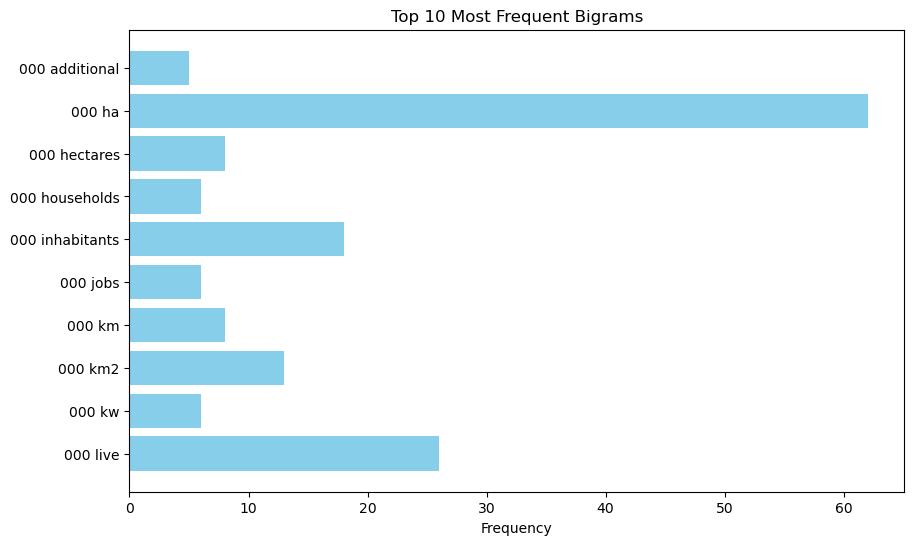

In [11]:
import matplotlib.pyplot as plt

# Plot the top 10 most frequent bigrams
top_bigrams = bigram_freq.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams['term'], top_bigrams['freq'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequent Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest on top
plt.show()


In [12]:
# trigrams, with stop words removed
count_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', min_df=5)
count_vector = count_vectorizer.fit_transform(corpus).toarray()
count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
trigram_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq": count_vector_df.sum(axis=0)})
print(trigram_freq.sort_values(by="freq", ascending=False)[:30])


                                                          term  freq
international human rights          international human rights   205
human rights law                              human rights law   158
labour force participation          labour force participation   157
sub saharan africa                          sub saharan africa   137
convention human rights                convention human rights   123
international criminal law          international criminal law   113
higher education institutions    higher education institutions   110
european convention human            european convention human   106
upper secondary education            upper secondary education    97
court human rights                          court human rights    95
middle income countries                middle income countries    93
play important role                        play important role    92
international humanitarian law  international humanitarian law    90
health care services              

In [13]:
# changed min_df to 10 (appears in at least 10 documents)
count_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=10)
count_vector = count_vectorizer.fit_transform(corpus).toarray()
count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
bigram_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq": count_vector_df.sum(axis=0)})
print(bigram_freq.sort_values(by="freq", ascending=False)[:30])


                                            term  freq
human rights                        human rights  2003
climate change                    climate change  1361
et al                                      et al  1253
oecd countries                    oecd countries   951
developing countries        developing countries   895
health care                          health care   888
united states                      united states   833
long term                              long term   798
international law              international law   779
labour market                      labour market   761
gender equality                  gender equality   628
energy efficiency              energy efficiency   548
private sector                    private sector   535
renewable energy                renewable energy   513
united nations                    united nations   497
climate finance                  climate finance   489
sustainable development  sustainable development   484
economic g

In [20]:
# apply to SDG 8 corpus (only documents labeled with SDG 8)
sdg8_corpus = text_df[text_df['sdg'] == '8']['text']

count_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=5)
count_vector = count_vectorizer.fit_transform(sdg8_corpus).toarray()
count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
bigram_freq_sdg8 = pd.DataFrame({"term": count_vector_df.columns.values, "freq": count_vector_df.sum(axis=0)})

print(bigram_freq_sdg8.sort_values(by="freq", ascending=False).head(30))


                                          term  freq
labour market                    labour market   184
labour force                      labour force    89
young people                      young people    75
foreign bom                        foreign bom    54
long term                            long term    49
bom workers                        bom workers    43
percentage points            percentage points    42
oecd countries                  oecd countries    41
economic growth                economic growth    40
et al                                    et al    38
social security                social security    36
job search                          job search    33
job creation                      job creation    33
united states                    united states    30
unemployment rate            unemployment rate    29
minimum wage                      minimum wage    29
force participation        force participation    27
time work                            time work